In [35]:
import sys
import importlib
from pathlib import Path

# Add parent directory to path so we can import scripts
sys.path.insert(0, str(Path.cwd().parent))

# Clear ALL cached modules to force fresh import
modules_to_clear = [k for k in sys.modules.keys() if k.startswith('scripts')]
for module in modules_to_clear:
    del sys.modules[module]

# Force reload
# import importlib
# if 'scripts' in sys.modules:
#     importlib.reload(sys.modules['scripts'])

from scripts.extract import run as extract
from scripts.clean import run as clean
from scripts.analysis import add_kpis, get_top_movies
from scripts.queries import (bruce_willis_scifi_action, uma_thurman_tarantino,
                             franchise_analysis, top_franchises, top_directors)
from scripts.visualize import (revenue_vs_budget, roi_by_genre, popularity_vs_rating,
                               yearly_trends, franchise_vs_standalone_comparison)


In [18]:
df_raw = extract()


In [26]:
df_clean = clean(df_raw)
df_clean.head()

,id,title,tagline,release_date,genres,collection_name,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,8.237,16.2237,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,106,Joe Russo,607
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,7.594,51.0975,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,990
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,7.255,8.5977,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,8.235,22.6948,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo,733
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,7.903,27.5792,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262


In [28]:
df_final = add_kpis(df_clean)

In [29]:

print("PART 1: TOP MOVIES BY METRICS")
display(get_top_movies(df_final, 'revenue_musd', display_cols=['title', 'revenue_musd', 'budget_musd', 'genres']))
display(get_top_movies(df_final, 'profit_musd', display_cols=['title', 'profit_musd', 'revenue_musd', 'budget_musd']))
display(get_top_movies(df_final, 'roi', top_n=5, filter_condition=(df_final['budget_musd'] >= 10), display_cols=['title', 'roi', 'revenue_musd', 'budget_musd']))


PART 1: TOP MOVIES BY METRICS


,title,revenue_musd,budget_musd,genres
1,Avatar,2923.706026,237.0,Action|Adventure|Fantasy|Science Fiction
0,Avengers: Endgame,2799.439100,356.0,Adventure|Science Fiction|Action
4,Titanic,2264.162353,200.0,Drama|Romance
2,Star Wars: The Force Awakens,2068.223624,245.0,Adventure|Action|Science Fiction
3,Avengers: Infinity War,2052.415039,300.0,Adventure|Action|Science Fiction


,title,profit_musd,revenue_musd,budget_musd
1,Avatar,2686.706026,2923.706026,237.0
0,Avengers: Endgame,2443.439100,2799.439100,356.0
4,Titanic,2064.162353,2264.162353,200.0
2,Star Wars: The Force Awakens,1823.223624,2068.223624,245.0
3,Avengers: Infinity War,1752.415039,2052.415039,300.0


,title,roi,revenue_musd,budget_musd
1,Avatar,12.336312,2923.706026,237.0
4,Titanic,11.320812,2264.162353,200.0
5,Jurassic World,11.143583,1671.537444,150.0
11,Harry Potter and the Deathly Hallows: Part 2,10.732090,1341.511219,125.0
13,Frozen II,9.691223,1453.683476,150.0


In [30]:
print("PART 2: ADVANCED FILTERING")

print("\nScience Fiction + Action movies with Bruce Willis:")
display(bruce_willis_scifi_action(df_final))

print("\nUma Thurman movies directed by Quentin Tarantino:")
display(uma_thurman_tarantino(df_final))

PART 2: ADVANCED FILTERING

Science Fiction + Action movies with Bruce Willis:


,title,vote_average,vote_count,genres,cast



Uma Thurman movies directed by Quentin Tarantino:


,title,runtime,director,cast,release_date


In [31]:
print("PART 3: FRANCHISE ANALYSIS")

print("\nFranchise vs Standalone Comparison:")
display(franchise_analysis(df_final))

print("\nTop Franchises by Revenue:")
display(top_franchises(df_final).head(10))

print("\nTop Directors by Revenue:")
display(top_directors(df_final).head(10))


PART 3: FRANCHISE ANALYSIS

Franchise vs Standalone Comparison:


,Metric,Franchise Movies,Standalone Movies,Difference
0,Mean Revenue (M USD),1682.668411,1765.139159,-82.470747
1,Median ROI,7.786117,9.617018,-1.830901
2,Mean Budget (M USD),218.000000,180.000000,38.000000
3,Mean Popularity,18.173844,19.979200,-1.805356
4,Mean Rating,7.390812,7.436000,-0.045188



Top Franchises by Revenue:


,num_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
collection_name,,,,,,
The Avengers Collection,4,1111.0,277.75,7776.07,1944.02,7.90
Star Wars Collection,2,545.0,272.50,3400.92,1700.46,7.03
Jurassic Park Collection,2,320.0,160.00,2982.01,1491.00,6.62
Avatar Collection,1,237.0,237.00,2923.71,2923.71,7.59
Frozen Collection,2,300.0,150.00,2727.90,1363.95,7.24
The Lion King (Reboot) Collection,1,260.0,260.00,1662.02,1662.02,7.10
The Fast and the Furious Collection,1,190.0,190.00,1515.40,1515.40,7.22
Black Panther Collection,1,200.0,200.00,1349.93,1349.93,7.40
Harry Potter Collection,1,125.0,125.00,1341.51,1341.51,8.08



Top Directors by Revenue:


,num_movies,total_revenue,mean_rating
director,,,
James Cameron,2,5187.87,7.75
Joss Whedon,2,2924.22,7.57
Joe Russo,1,2799.44,8.24
J.J. Abrams,1,2068.22,7.26
Anthony Russo,1,2052.42,8.24
Colin Trevorrow,1,1671.54,6.70
Jon Favreau,1,1662.02,7.10
James Wan,1,1515.40,7.22
Jennifer Lee,1,1453.68,7.24



PART 4: VISUALIZATIONS


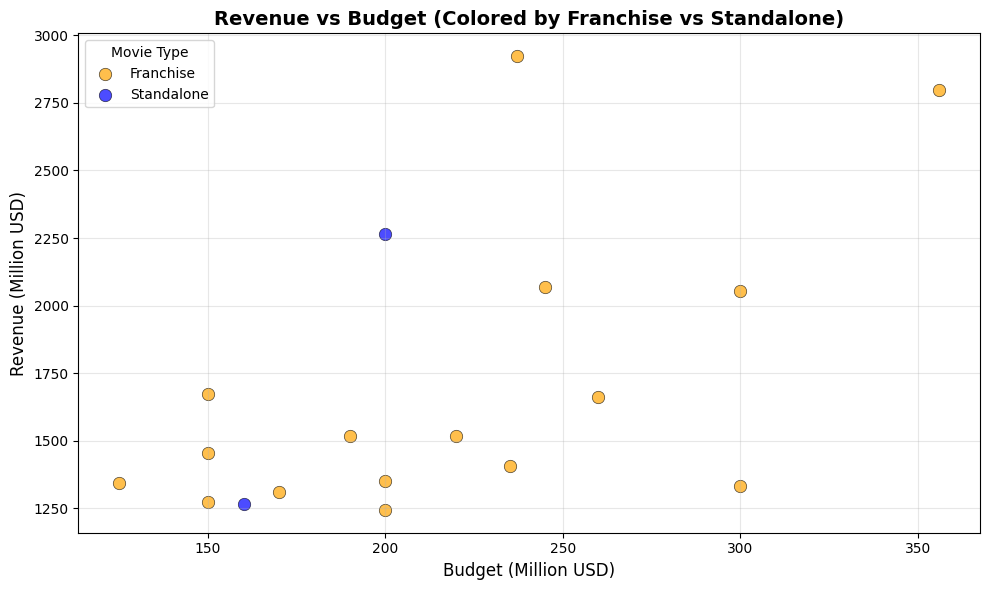

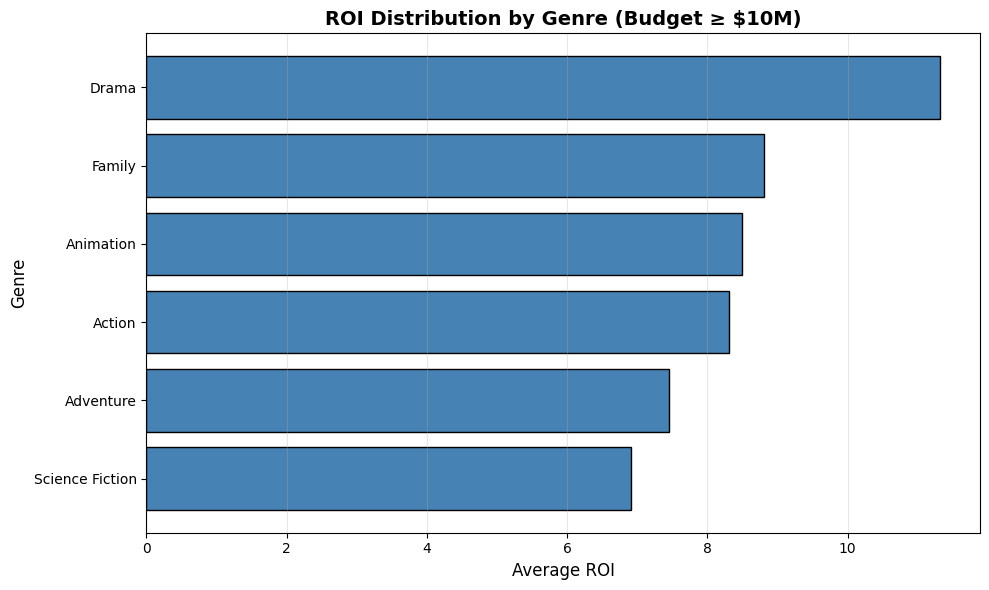

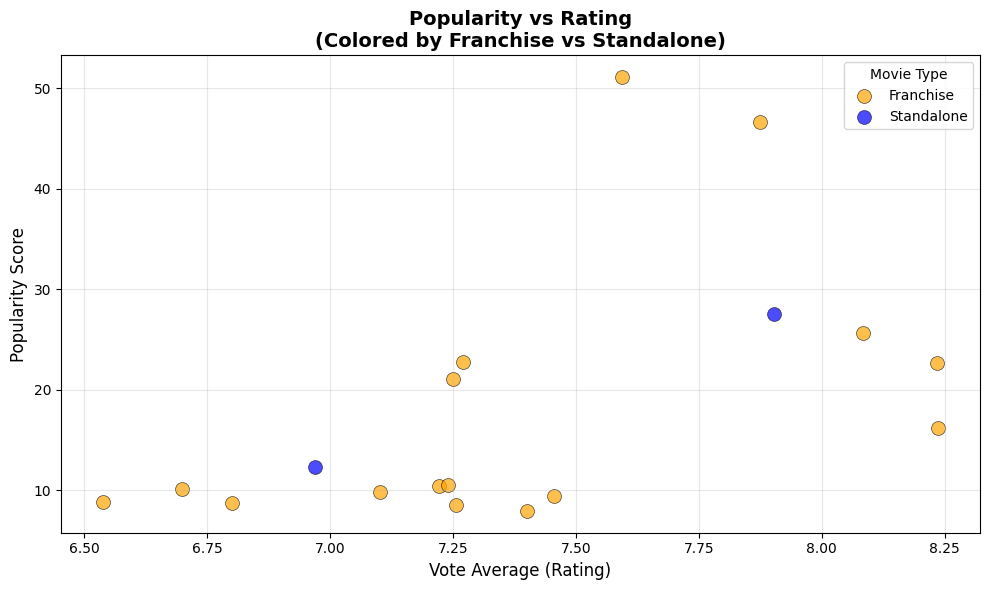

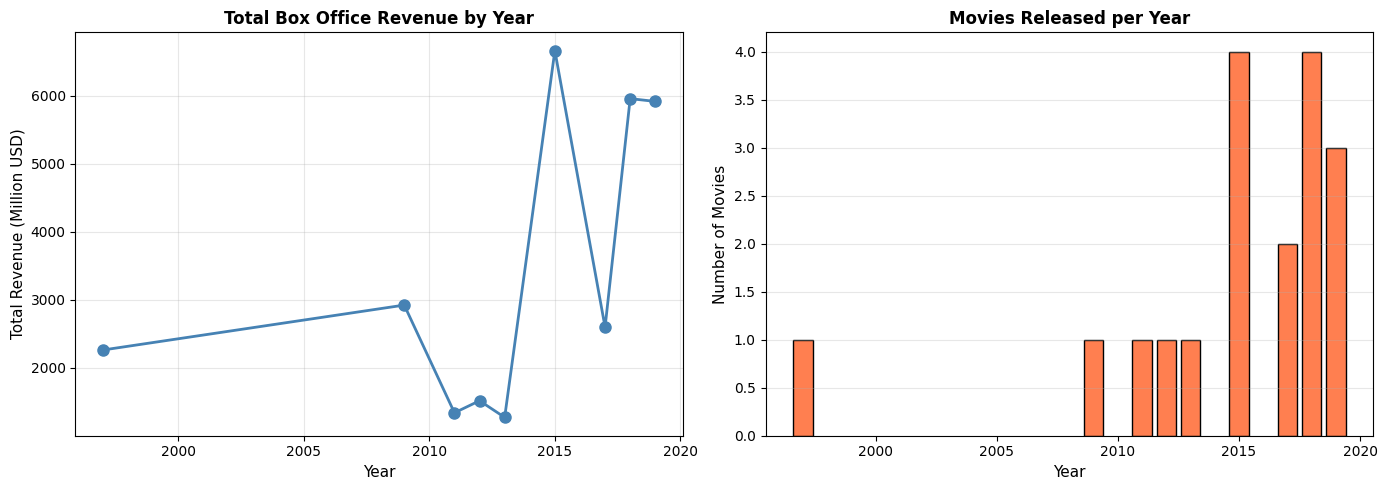

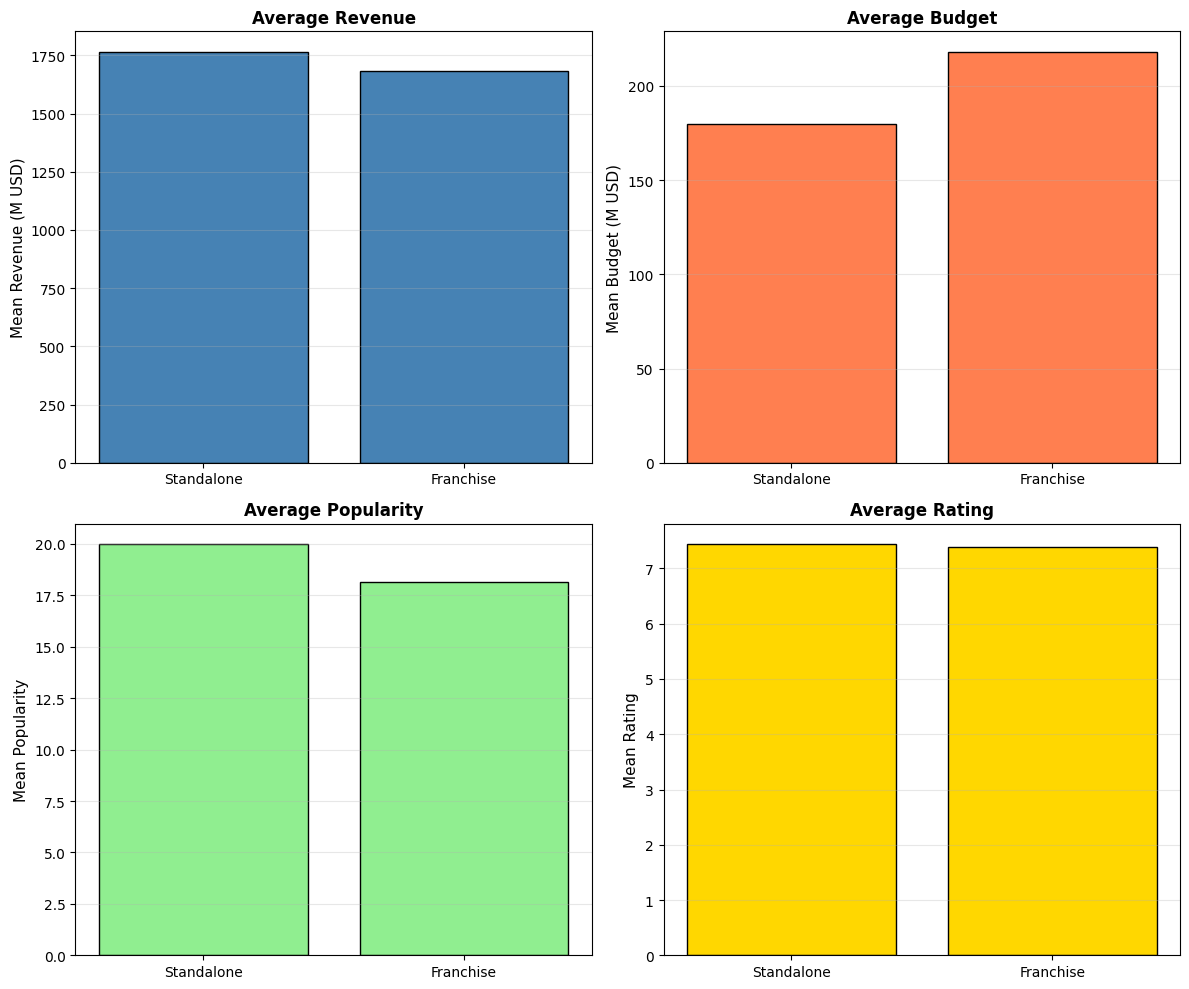

In [ ]:
print("PART 4: VISUALIZATIONS")
revenue_vs_budget(df_final)
roi_by_genre(df_final)
popularity_vs_rating(df_final)
yearly_trends(df_final)
franchise_vs_standalone_comparison(df_final)